In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [30]:
ifind_data = pd.read_excel(r'C:\Users\pavithra\Desktop\IFND (1).xlsx')

In [31]:
ifind_data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,True
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,True
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,True
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,True


In [32]:
ifind_data['Label'].value_counts()

True    37800
Fake    18914
Name: Label, dtype: int64

In [33]:
ifind_data.rename(columns={'Statement': 'text', 'Label': 'target','Date':'date'}, inplace=True)

In [34]:
ifind_data['target'] = ifind_data['target'].astype(str)
ifind_data['target'].replace(['True','Fake'],[1,0], inplace=True)

In [35]:
ifind_data['target'].value_counts()

1    37800
0    18914
Name: target, dtype: int64

In [36]:
ifind_data.head()

,id,text,Image,Web,Category,date,target
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,2020-10-01 00:00:00,1
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,2020-10-01 00:00:00,1
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,2020-10-01 00:00:00,1
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,2020-10-01 00:00:00,1


1    37800
0    18914
Name: target, dtype: int64


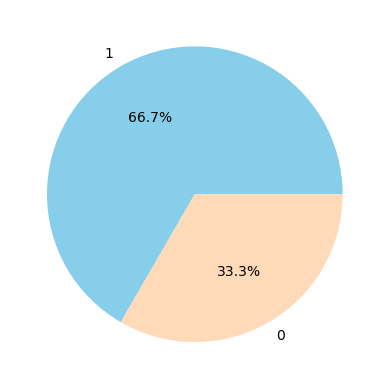

In [37]:
print(ifind_data["target"].value_counts())
g1 = plt.pie(ifind_data["target"].value_counts().values,explode=[0,0],labels=ifind_data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

GOVERNMENT    10923
VIOLENCE      10578
COVID-19       8710
POLITICS       8670
ELECTION       8396
TERROR         4384
MISLEADING     4059
TRAD            976
MISLEADIND       18
Name: Category, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

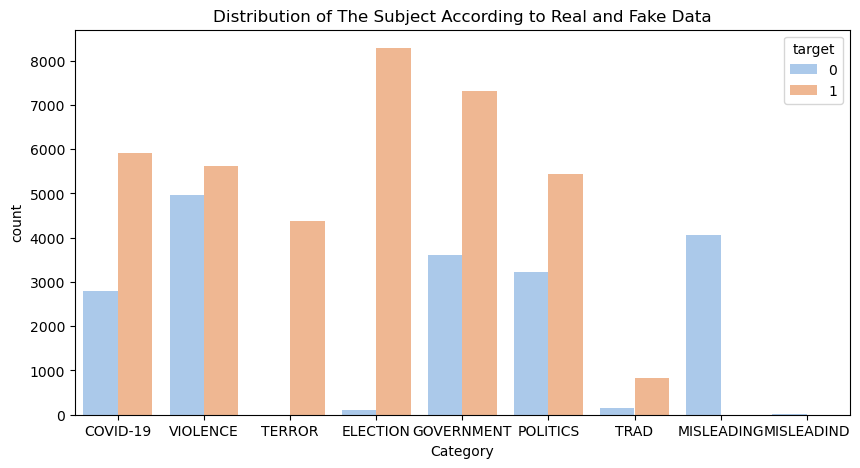

In [38]:
print(ifind_data.Category.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="Category",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

TRIBUNEINDIA        11832
AUGMENT             11321
THEPRINT             8582
THESTATESMAN         7202
THESTATEMAN          4048
INDIANEXPRESS        3983
NEWSMOBILE           2422
INDIATODAY           1698
BOOMLIVE              806
CNN                   778
NEWSMETER             572
ONEINDIA              549
BSMEDIA               449
TEEKHIMIRCHI          387
FACTCRESCENDO         272
AFP                   267
TIMESNOW              238
THELOGICALINDIAN      221
DIGITEYE              175
FACTLY                174
THELOGICALINDIA       173
FACTCHECKER           163
DAPAAN                136
DNAINDIA              121
ALT                    59
WAHSARKAR              42
ENGLISHTRIBUNE         21
INDUSTANTIMES          15
NDTV                    8
Name: Web, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

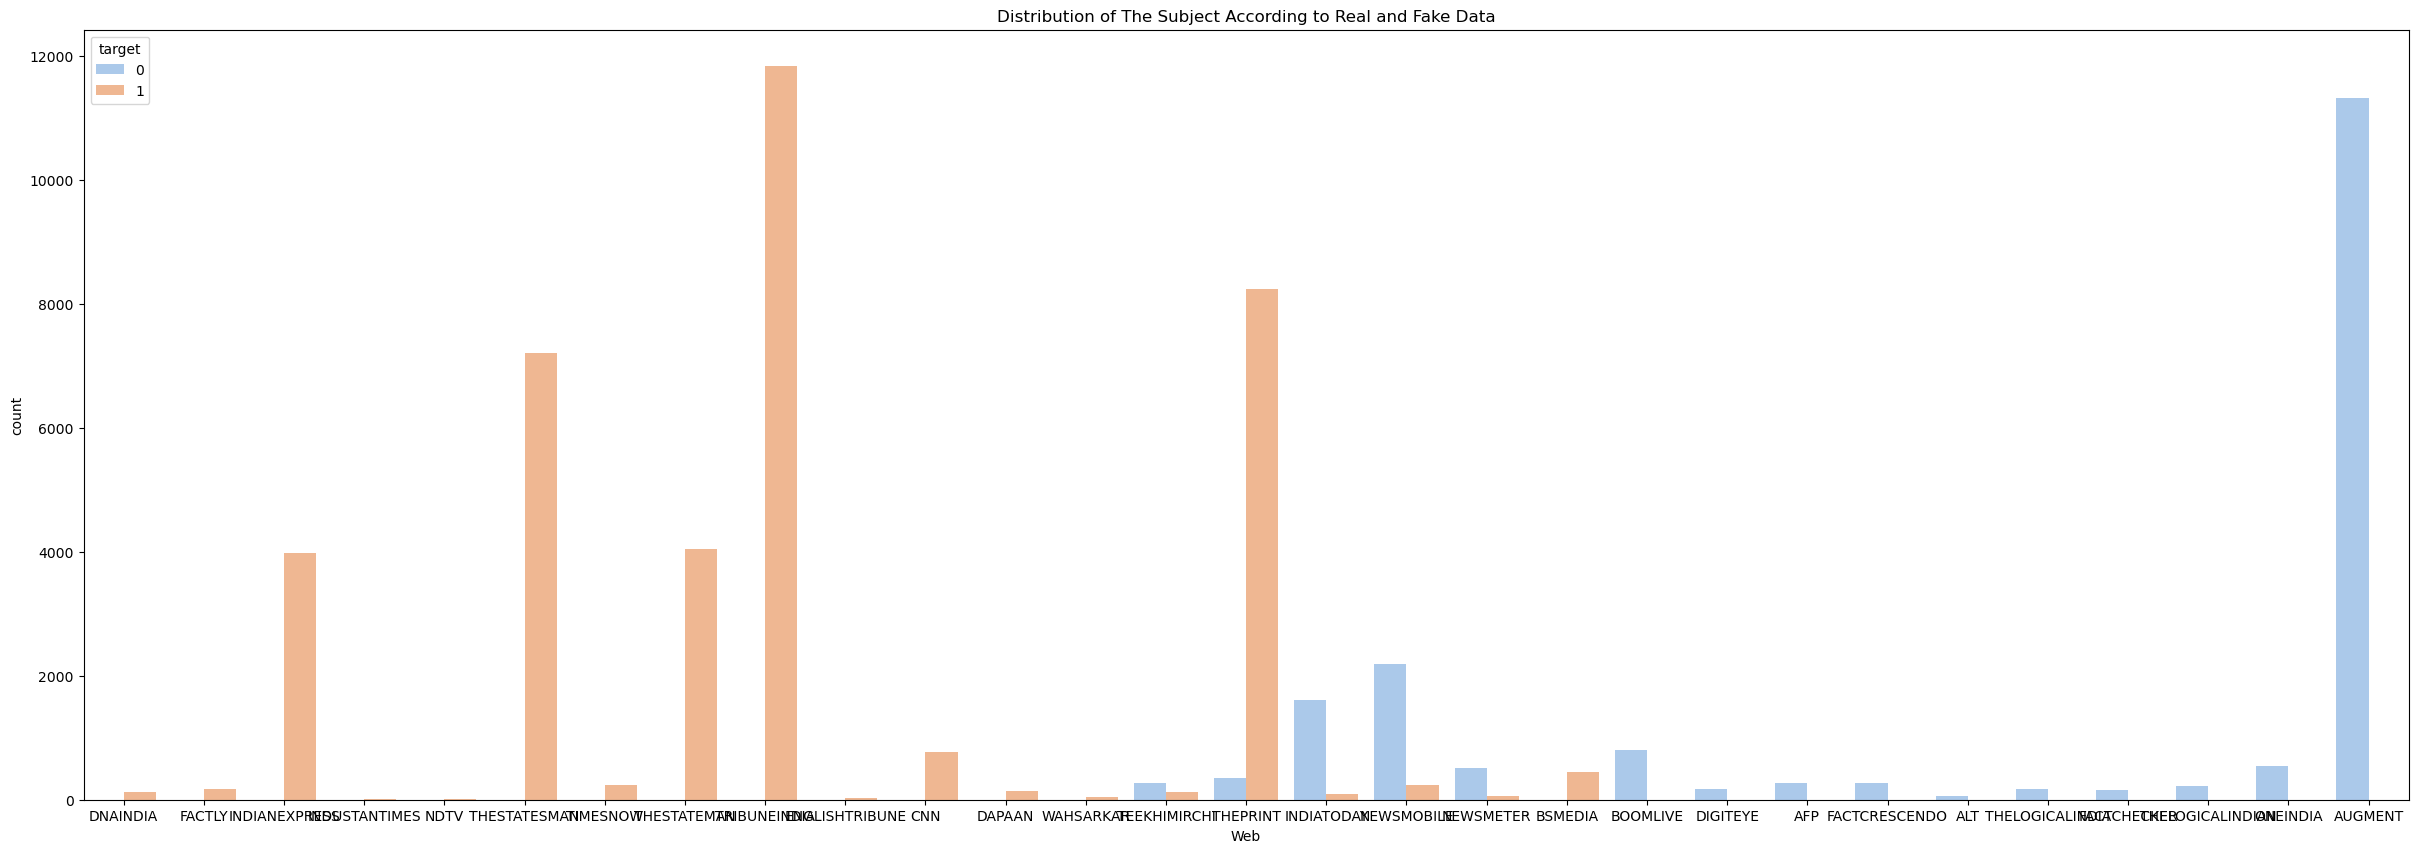

In [39]:
print(ifind_data.Web.value_counts())
plt.figure(figsize=(30, 10))

ax = sns.countplot(x="Web",  hue='target', data=ifind_data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [40]:
ifind_data.groupby(['Web','target'])['id'].count()

Web               target
AFP               0           267
ALT               0            59
AUGMENT           0         11321
BOOMLIVE          0           806
BSMEDIA           1           449
CNN               1           778
DAPAAN            1           136
DIGITEYE          0           175
DNAINDIA          1           121
ENGLISHTRIBUNE    1            21
FACTCHECKER       0           163
FACTCRESCENDO     0           272
FACTLY            1           174
INDIANEXPRESS     1          3983
INDIATODAY        0          1606
                  1            92
INDUSTANTIMES     1            15
NDTV              1             8
NEWSMETER         0           506
                  1            66
NEWSMOBILE        0          2190
                  1           232
ONEINDIA          0           549
TEEKHIMIRCHI      0           262
                  1           125
THELOGICALINDIA   0           173
THELOGICALINDIAN  0           221
THEPRINT          0           344
                  1    

In [41]:
data = ifind_data[['text','target']].copy()

In [42]:
data.head()

,text,target
0,"WHO praises India's Aarogya Setu app, says it ...",1
1,"In Delhi, Deputy US Secretary of State Stephen...",1
2,LAC tensions: China's strategy behind delibera...,1
3,India has signed 250 documents on Space cooper...,1
4,Tamil Nadu chief minister's mother passes away...,1


In [43]:
first_text = data.text[10]
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [44]:
#Removal of html content
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

"Amid stubble burning, Delhi's air quality deteriorates to 'very poor'"

In [45]:
#removal of punctuation marks and special characters
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'amid stubble burning  delhi s air quality deteriorates to  very poor '

In [46]:
 nltk.download('punkt')
 nltk.download("stopwords") 
 nltk.download('wordnet')
from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#tokenization and stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]
first_text

['amid',
 'stubble',
 'burning',
 'delhi',
 'air',
 'quality',
 'deteriorates',
 'poor']

In [48]:
#lemmatization
import nltk
nltk.download('omw-1.4')
first_text = "Amid stubble burning, Delhi's air quality deteriorates to 'very poor "
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text.split()] 
first_text = " ".join(first_text)
first_text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pavithra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"Amid stubble burning, Delhi's air quality deteriorates to 'very poor"

In [49]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [50]:
#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    #lemma = nltk.WordNetLemmatizer()
    
    final_text = [word for word in text if word not in stopwords.words('english')]
    return " ".join(final_text)

In [51]:
def remove_stopwords(text):
    final_text = []
    final_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(final_text)

In [52]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [53]:
data['text']=data['text'].apply(remove_html)
data['text']=data['text'].apply(remove_punctuations)
data['text']=data['text'].apply(remove_characters)
data['text']=data['text'].apply(remove_stopwords)

In [54]:
data.head()

,text,target
0,praises India Aarogya Setu app says helped ide...,1
1,Delhi Deputy US Secretary State Stephen Biegun...,1
2,LAC tensions China strategy behind deliberatel...,1
3,India signed documents Space cooperation count...,1
4,Tamil Nadu chief minister mother passes away,1


In [55]:
data.tail()

,text,target
56709,Fact Check Bruce Lee playing ping pong Nunchaku,0
56710,Fact Check Japan construct bridge hours,0
56711,Fact Check Viral video Mexico earthquake years...,0
56712,Fact Check Ballet performance Chinese couple g...,0
56713,Fact Check little boy crossing Jordan alone lo...,0


In [56]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


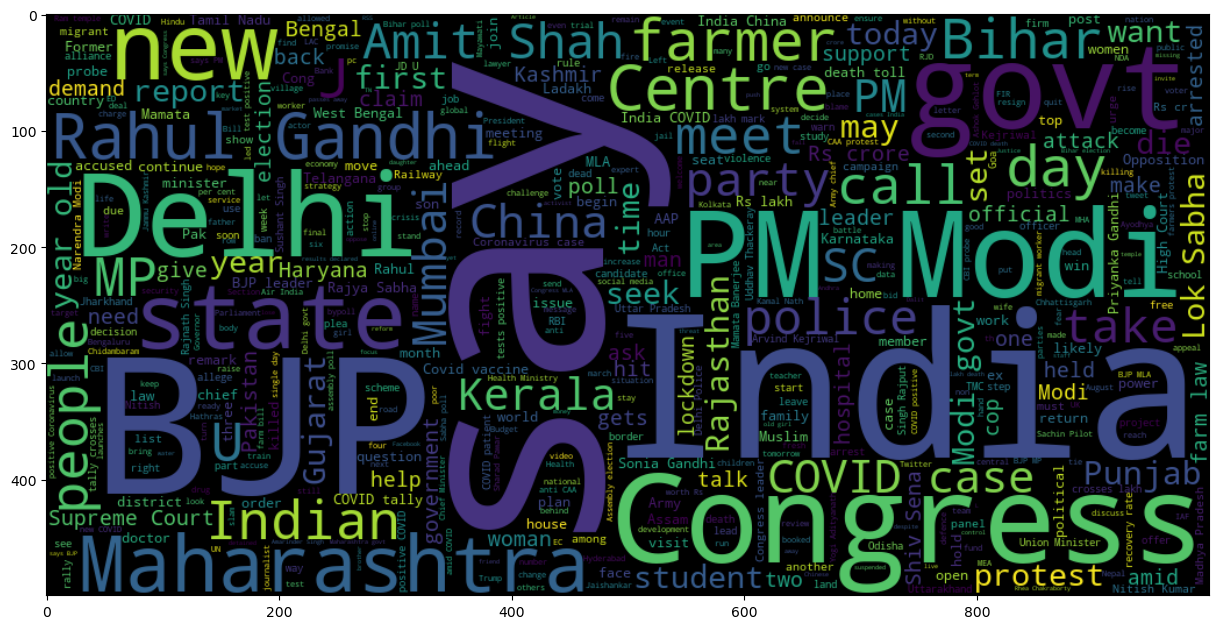

In [57]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

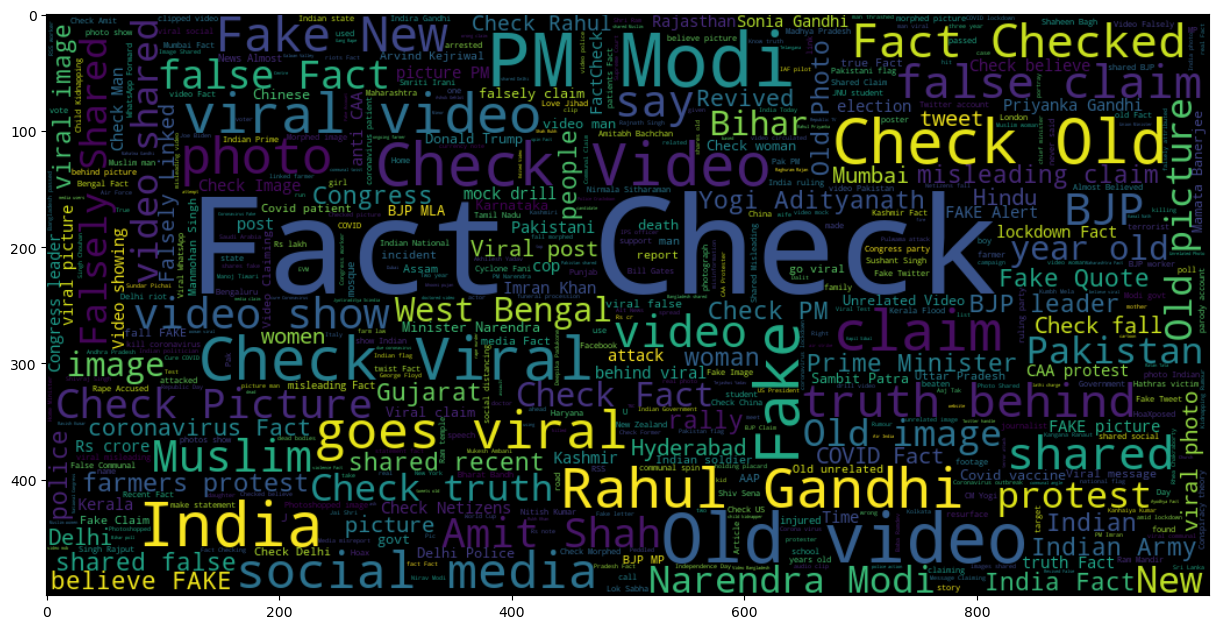

In [58]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

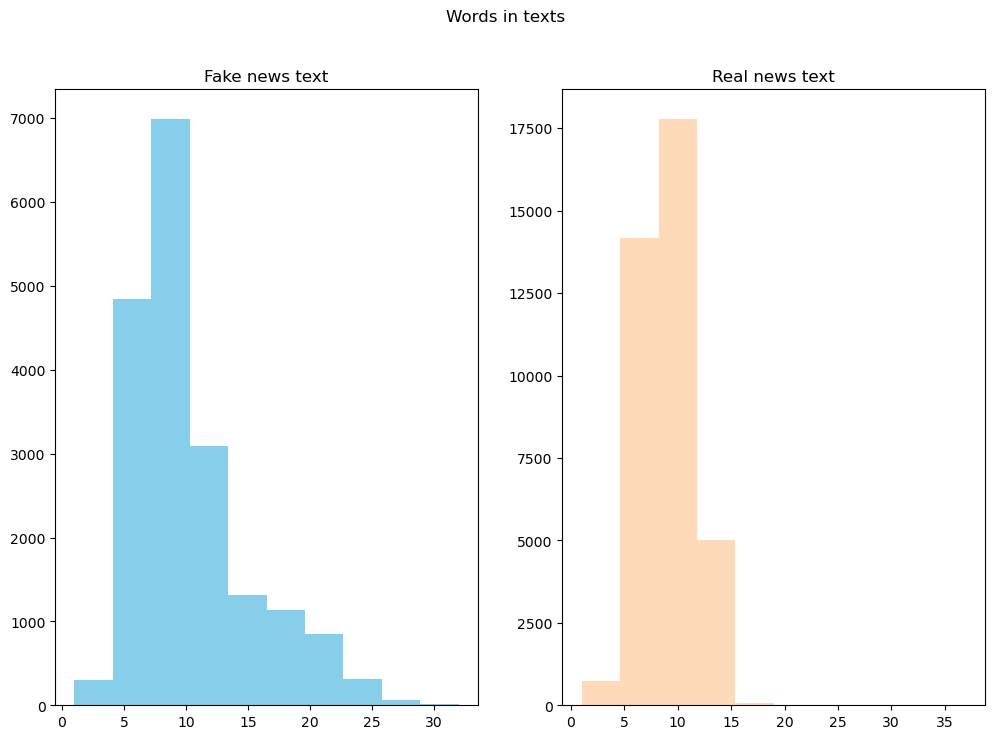

In [59]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

In [60]:
texts = ' '.join(data['text'])

In [61]:
string = texts.split(" ")

In [62]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

       word  count
0   (Fact,)   9958
1  (Check,)   9045
2  (India,)   5122
3    (BJP,)   4680
4   (Modi,)   4518


<Axes: xlabel='count', ylabel='word'>

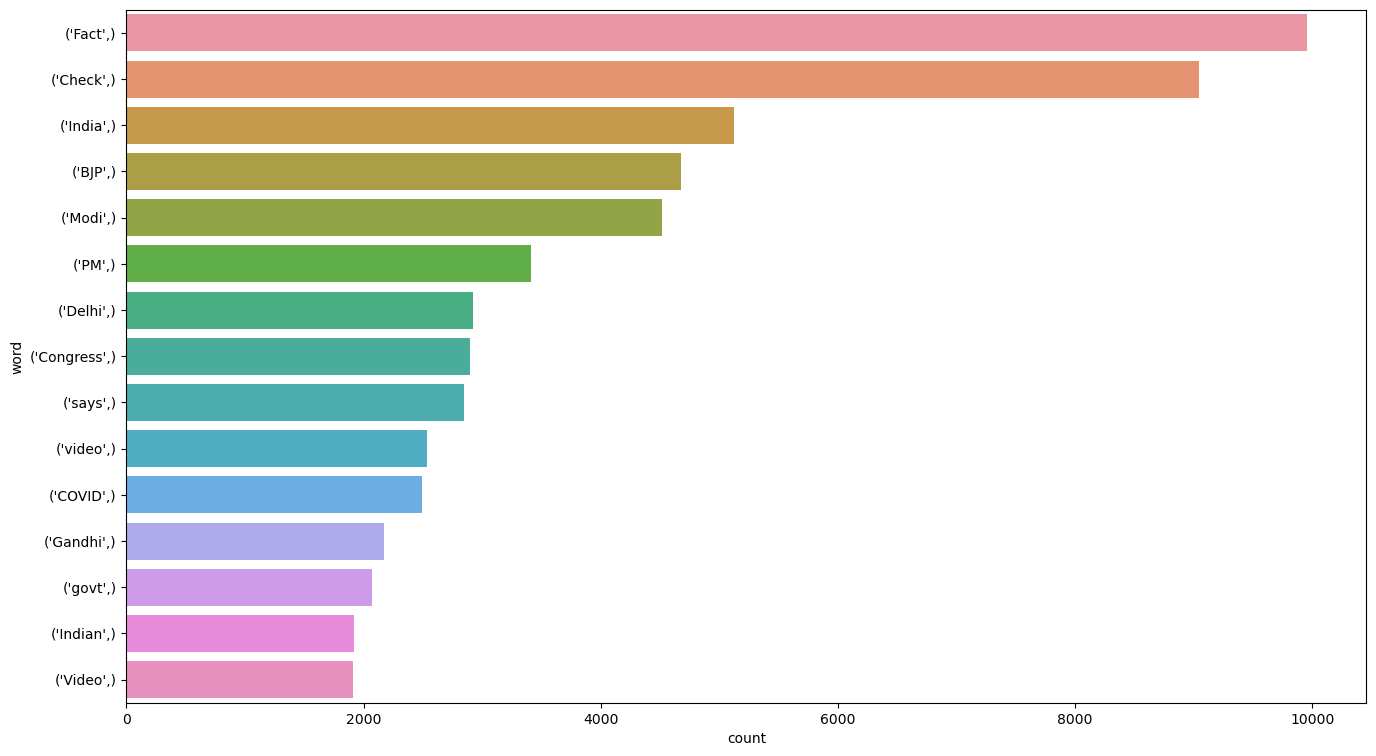

In [63]:
draw_n_gram(string,1)

              word  count
0    (Fact, Check)   9011
1       (PM, Modi)   2328
2  (Rahul, Gandhi)   1228
3     (Amit, Shah)    739
4           (J, K)    711


<Axes: xlabel='count', ylabel='word'>

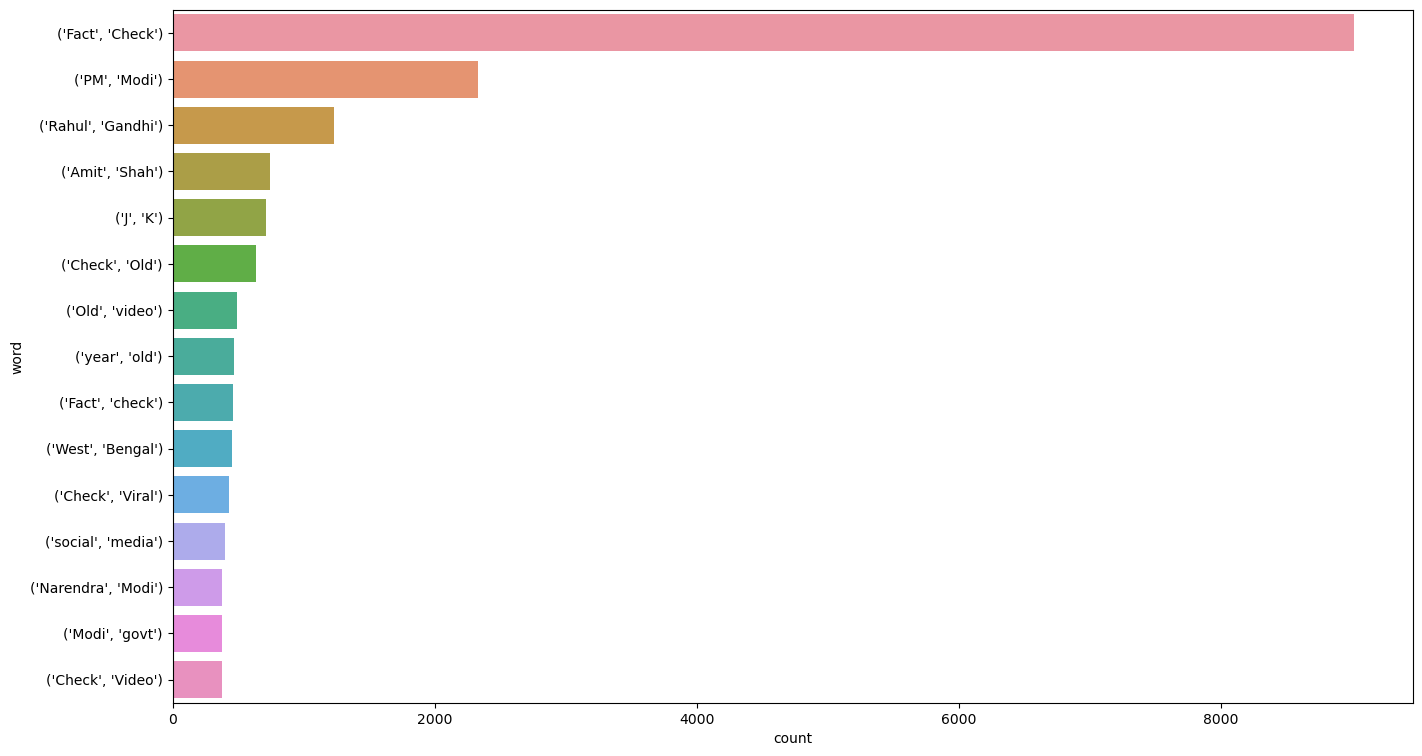

In [64]:
draw_n_gram(string,2)

                       word  count
0        (Fact, Check, Old)    638
1      (Fact, Check, Viral)    429
2      (Fact, Check, Video)    373
3  (Sushant, Singh, Rajput)    189
4      (Fact, Check, video)    176


<Axes: xlabel='count', ylabel='word'>

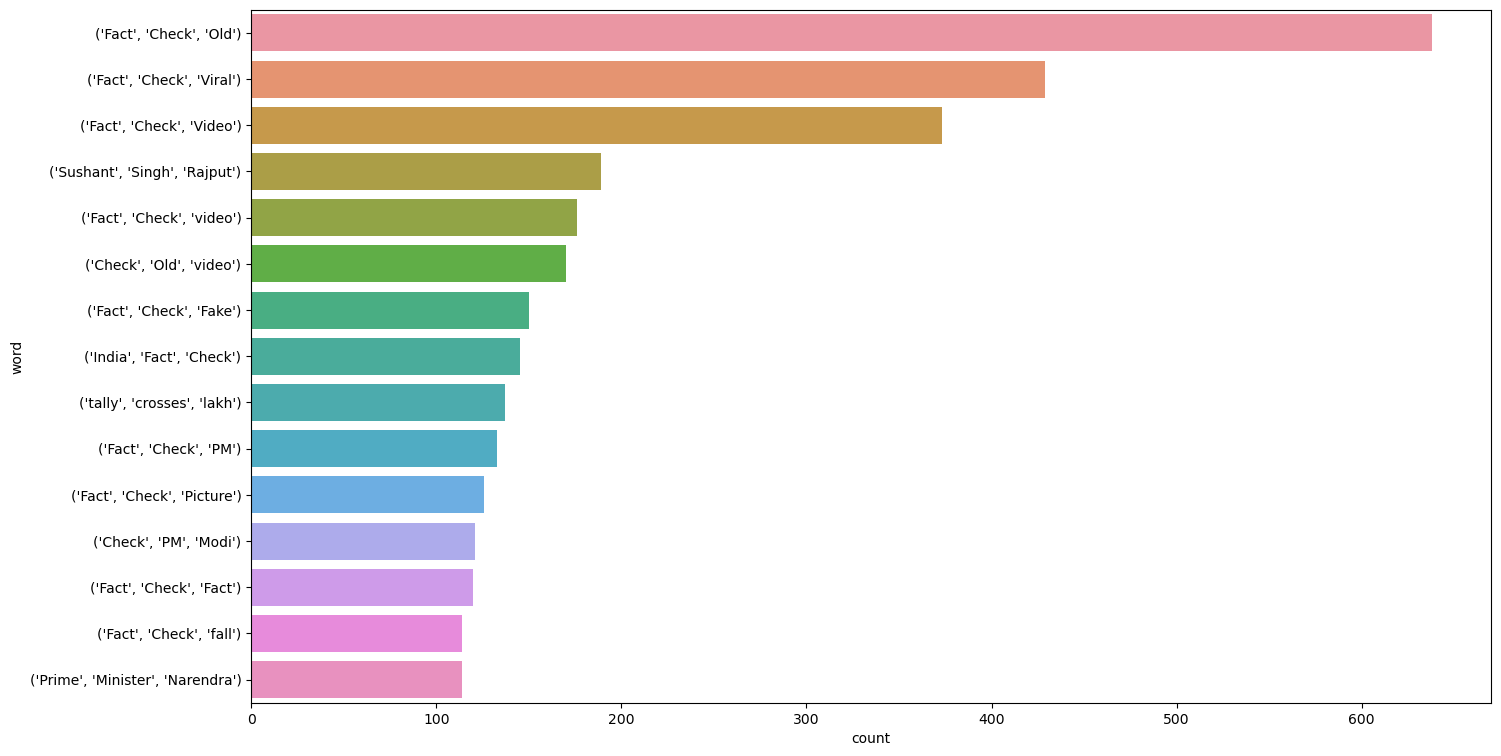

In [65]:
draw_n_gram(string,3)

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
X = data['text']
y = data['target']
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()





In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [69]:
print('\n the total number of training data :',y_train.shape)


 the total number of training data : (39699,)


In [70]:
print('\n the total number of testing data :',y_test.shape)


 the total number of testing data : (17015,)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [72]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)
# Classification metrics
classification_report = classification_report(y_test, y_pred)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9342344989714957


In [73]:
# Training the classifier & predicting on test data
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
# Classification metrics

print('\n Accuracy: ', accuracy_score(y_test, y_pred))



 Accuracy:  0.9286511901263591


In [74]:
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.9294739935351161


In [75]:
!pip install textblob 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
from datetime import datetime

In [77]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")
    times_of_india_news = []
    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter),datetime.today().strftime('%Y-%m-%d') + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    times_of_india_news.append(['Times of India',datetime.today().strftime('%Y-%m-%d'),litag.text])
    return times_of_india_news

In [78]:
times_of_india_news = timesofindia()

1 2023-09-11.Why we should remember Swami Vivekananda and not the terror attack on 9/1110 Sep 2023, 1855 hrs IST - https://timesofindia.indiatimes.com/india/the-true-significance-of-9/11/articleshow/103555212.cms
2 2023-09-11.After Chandrayaan, it's Samudrayaan: All about India's deep dive - https://timesofindia.indiatimes.com/india/matsya-to-take-a-dip-in-bay-of-bengal-next-year/articleshow/103563053.cms
3 2023-09-11.G20 Summit: 6G alliance, other tech and telecom partnerships announced - https://timesofindia.indiatimes.comhttps://www.gadgetsnow.com/slideshows/g20-summit-6g-alliance-and-other-tech-tech-and-telecom-partnerships-announced-by-india-and-the-us/photolist/103580785.cms
4 2023-09-11.Kohli slams 77th ton, becomes fastest to 13,000 ODI runs - https://timesofindia.indiatimes.com/sports/cricket/asia-cup/masterful-virat-kohli-slams-77th-international-ton-becomes-fastest-to-13000-odi-runs/articleshow/103581903.cms
5 2023-09-11.Apple may discontinue these accessories with the new i

In [79]:
pip install -U pip

                                              0.0/2.1 MB ? eta -:--:--
     ----                                     0.2/2.1 MB 7.6 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 10.1 MB/s eta 0:00:01
     -------------------------                1.3/2.1 MB 11.9 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 13.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install --upgrade setuptools

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/82/3b/0715493246eb08e93506f4da0efe1d05a3c9d9ac3b76e97cc362890e6adf/setuptools-68.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/807.8 kB ? eta -:--:--
   ------ --------------------------------- 122.9/807.8 kB 3.5 MB/s eta 0:00:01
   ------------- -------------------------- 276.5/807.8 kB 4.2 MB/s eta 0:00:01
   ------------------------- -------------- 522.2/807.8 kB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 768.0/807.8 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 807.8/807.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.8.0
    Uninstalling setuptools-67.8.0:
      Successfully uninstalled setuptools-67.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
anaconda-client 1.11.2 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.24.0 which is incompatible.


In [81]:
pip install feedparser

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install "beautifulsoup4==4.9.1"

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install "dateparser==0.7.6"

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install "requests==2.24.0"

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install "feedparser==6.0.8"

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install --no-deps pygooglenews

Note: you may need to restart the kernel to use updated packages.


In [87]:
from pygooglenews import GoogleNews
import json
import time



def fetching_google_news():
    gn = GoogleNews()
    top = gn.top_news()

    entries = top["entries"]
    count = 0
    google_news = []
    for entry in entries:
        count = count + 1
        print( str(count) + ". " + entry["title"] + entry["published"])
        google_news.append(['Google News',entry["published"],entry["title"] ])
        time.sleep(0.25)
    return google_news

In [88]:
google_news = fetching_google_news()

1. Earthquake damages centuries-old sites in Marrakech but spares modern city - CNNMon, 11 Sep 2023 10:30:00 GMT
2. In Russia's Pacific port, residents await North Korea's Kim Jong Un - ReutersMon, 11 Sep 2023 08:39:00 GMT
3. US and Vietnam unveil billions in semiconductor and AI deals - Financial TimesMon, 11 Sep 2023 10:54:25 GMT
4. Trump is explaining exactly how wild and extreme his second term would be - CNNMon, 11 Sep 2023 07:46:00 GMT
5. Explosion rocks ADM plant in Decatur, Ill.; multiple employees injured - USA TODAYMon, 11 Sep 2023 12:10:55 GMT
6. Escaped Pennsylvania killer stole a van over the weekend and tried to contact acquaintances, police say. Here’s where the search stands - CNNMon, 11 Sep 2023 13:10:00 GMT
7. U.S. government funding fight resumes on Capitol Hill - MSNBCMon, 11 Sep 2023 10:32:46 GMT
8. 22nd Anniversary of the September 11, 2001 Attacks - United States Department of State - Department of StateMon, 11 Sep 2023 12:23:13 GMT
9. In Iowa, Trump and DeSantis

In [89]:
news_content = []

In [90]:
news_content+=times_of_india_news
news_content+= google_news
news_content_df = pd.DataFrame(news_content,columns = ['New_Site','Date' , 'Title'])

In [91]:
news_content_df.head()

,New_Site,Date,Title
0,Times of India,2023-09-11,Why we should remember Swami Vivekananda and n...
1,Times of India,2023-09-11,"After Chandrayaan, it's Samudrayaan: All about..."
2,Times of India,2023-09-11,"G20 Summit: 6G alliance, other tech and teleco..."
3,Times of India,2023-09-11,"Kohli slams 77th ton, becomes fastest to 13,00..."
4,Times of India,2023-09-11,Apple may discontinue these accessories with t...


In [92]:
textblob_sentiment=[]
for index , row in news_content_df.iterrows():
    title = row['Title']
    txt= TextBlob(title)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([a,b])

In [93]:
news_content_df['Text_blob_Polarity'] , news_content_df['Text_blob_Subjectivity'] = zip(*textblob_sentiment)

In [94]:
news_content_df['Title_clean']=news_content_df['Title'].apply(remove_html)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_punctuations)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_characters)
news_content_df['Title_clean']=news_content_df['Title_clean'].apply(remove_stopwords)

In [95]:
X_real = td.transform(news_content_df['Title_clean']).toarray()

In [96]:
news_content_df['Prediction_LR'] = classifier_lr.predict(X_real)
news_content_df['Prediction_RF'] = classifier_rf.predict(X_real)
news_content_df['Prediction_NB'] = classifier_nb.predict(X_real)

In [97]:
news_content_df['Prediction_LR'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_RF'].replace([1,0], ['True','Fake'],inplace=True)
news_content_df['Prediction_NB'].replace([1,0], ['True','Fake'],inplace=True)

In [98]:
news_content_df.head()

,New_Site,Date,Title,Text_blob_Polarity,Text_blob_Subjectivity,Title_clean,Prediction_LR,Prediction_RF,Prediction_NB
0,Times of India,2023-09-11,Why we should remember Swami Vivekananda and n...,0.000000,0.000000,remember Swami Vivekananda terror attack Sep h...,True,True,True
1,Times of India,2023-09-11,"After Chandrayaan, it's Samudrayaan: All about...",0.000000,0.400000,Chandrayaan Samudrayaan India deep dive,True,Fake,True
2,Times of India,2023-09-11,"G20 Summit: 6G alliance, other tech and teleco...",-0.125000,0.375000,G Summit G alliance tech telecom partnerships ...,True,True,True
3,Times of India,2023-09-11,"Kohli slams 77th ton, becomes fastest to 13,00...",0.000000,0.000000,Kohli slams th ton becomes fastest ODI runs,True,True,True
4,Times of India,2023-09-11,Apple may discontinue these accessories with t...,0.136364,0.454545,Apple may discontinue accessories new iPhones ...,True,True,True


In [99]:
news_content_df.to_excel('Result.xlsx')

In [100]:
def real_time_prediction(news):
  news_transformed = td.transform([news]).toarray()
  Prediction_LR = classifier_lr.predict(news_transformed)
  Prediction_RF = classifier_rf.predict(news_transformed)
  Prediction_NB = classifier_nb.predict(news_transformed)
  Prediction_LR = ['Real'  if i == 1 else 'Fake' for i in Prediction_LR ]
  print(f"Based on Logistic Regression model this News is ::{Prediction_LR[0]}")
  Prediction_RF = ['Real'  if i == 1 else 'Fake' for i in Prediction_RF ]
  print(f"Based on  Random Forest Model this News is ::{Prediction_RF[0]}")
  Prediction_NB = ['Real'  if i == 1 else 'Fake' for i in Prediction_NB ]
  print(f"Based on Naive Bayes model this News is :: {Prediction_NB[0]} ")

In [101]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)

Please Enter the News which you want to predict : Manipur crisis came into control
Based on Logistic Regression model this News is ::Real
Based on  Random Forest Model this News is ::Real
Based on Naive Bayes model this News is :: Real 


In [ ]:
news = input("Please Enter the News which you want to predict : ")
real_time_prediction(news)